## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

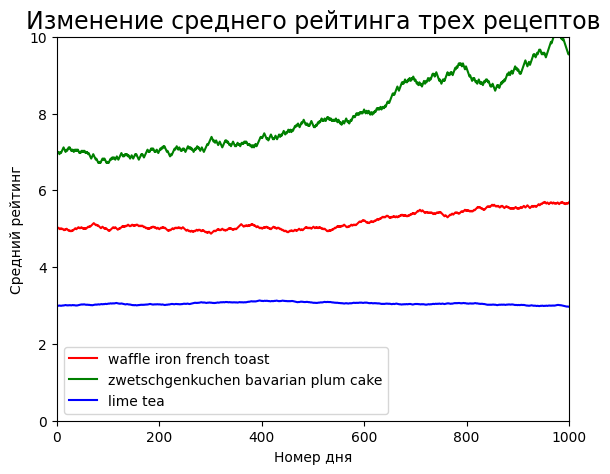

In [ ]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# рисуем график:
y1_line, = ax.plot(d,r, 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(d1,r1, 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(d2,r2, 'b', label = 'lime tea')
# -------------------
# явно определяем отображаемый дипазон:
ax.set_ylim([0,10])
ax.set_xlim([0,1000])
# -------------------
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line])
ax.set_title('Изменение среднего рейтинга трех рецептов',fontsize = 17);

In [ ]:
%matplotlib inline

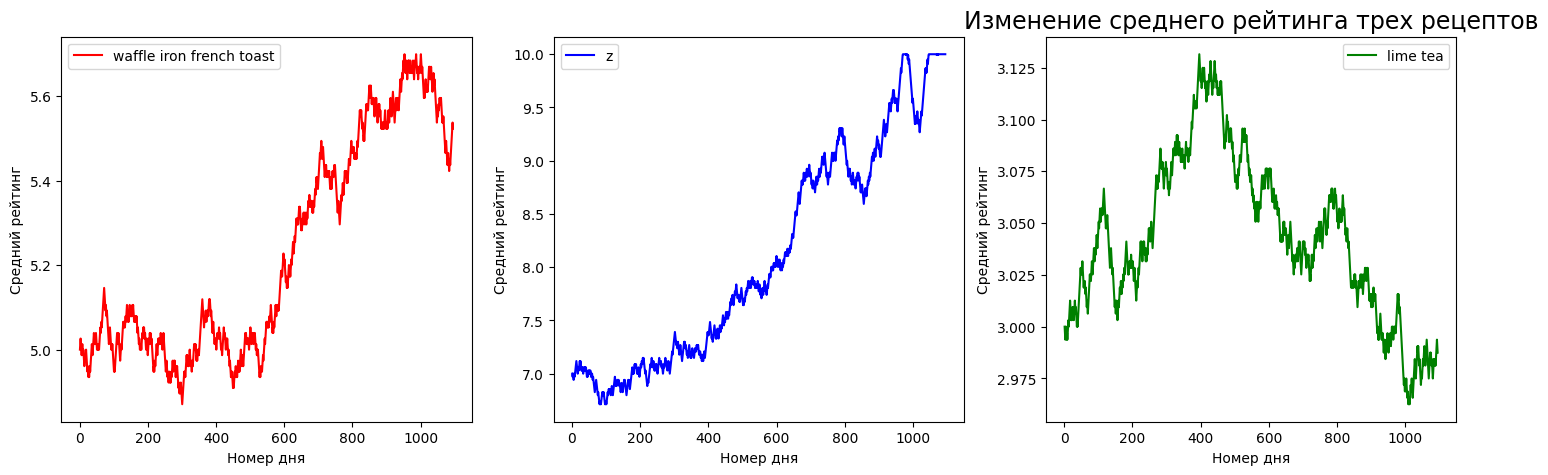

In [ ]:
arr = np.load('average_ratings.npy')
r = [i for i in arr[0]]
d = [i for i in range(1,len(arr[0])+1)]
r1 = [i for i in arr[1]]
d1 = [i for i in range(1,len(arr[1])+1)]
r2 = [i for i in arr[2]]
d2 = [i for i in range(1,len(arr[2])+1)]

fig,(ax,ax1,ax2) = plt.subplots(nrows=1, ncols=3)

ax.plot(d,r,'r',label = 'waffle iron french toast')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(18)



ax2.plot(d2,r2,'g',label = 'lime tea')
ax2.set_xlabel('Номер дня')
ax2.set_ylabel('Средний рейтинг')
ax2.legend()
fig.set_figheight(5)
fig.set_figwidth(18)


ax1.plot(d1,r1,'b',label = 'zwetschgenkuchen bavarian plum cake')
ax1.set_xlabel('Номер дня')
ax1.set_ylabel('Средний рейтинг')
ax1.legend('zwetschgenkuchen bavarian plum cake')
fig.set_figheight(5)
fig.set_figwidth(18)

plt.title('Изменение среднего рейтинга трех рецептов',fontsize = 17)
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


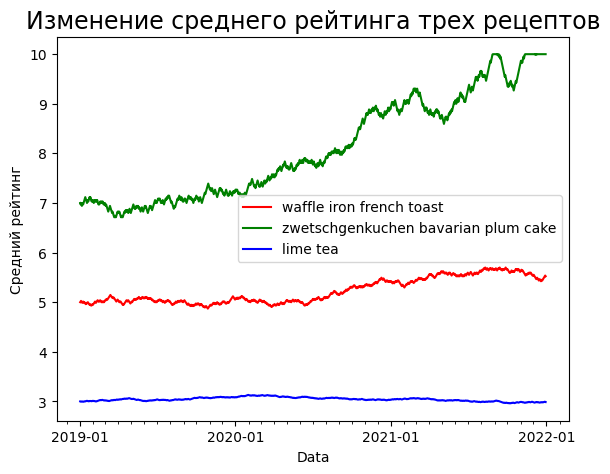

In [ ]:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# рисуем график:
y1_line, = ax.plot(data,r, 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(data,r1, 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(data,r2, 'b', label = 'lime tea')
# -------------------
# явно определяем отображаемый дипазон:
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
# -------------------
ax.set_xlabel('Data')
ax.set_ylabel('Средний рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line])
ax.set_title('Изменение среднего рейтинга трех рецептов',fontsize = 17);

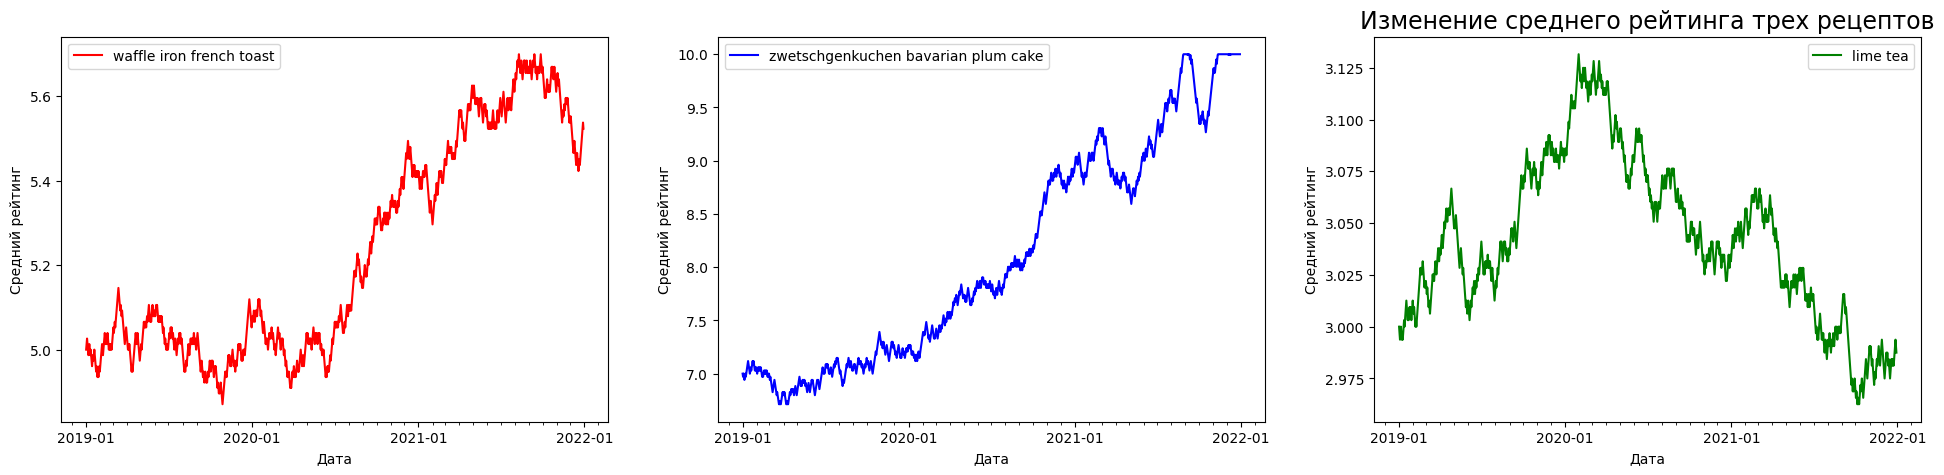

In [ ]:
data = pd.date_range(start='2019-1-1', end='2021-12-30')

fig,(ax,ax1,ax2) = plt.subplots(nrows=1, ncols=3)

ax.plot(data,r,'r',label = 'waffle iron french toast')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.legend(loc = 'best')
fig.set_figheight(5)
fig.set_figwidth(24)



ax2.plot(data,r2,'g',label = 'lime tea')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel('Дата')
ax2.set_ylabel('Средний рейтинг')
ax2.legend(loc = 'best')
fig.set_figheight(5)
fig.set_figwidth(24)


ax1.plot(data,r1,'b',label = 'zwetschgenkuchen bavarian plum cake')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel('Дата')
ax1.set_ylabel('Средний рейтинг')
ax1.legend(loc = 'best')
fig.set_figheight(5)
fig.set_figwidth(24)

plt.title('Изменение среднего рейтинга трех рецептов',fontsize = 17)
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

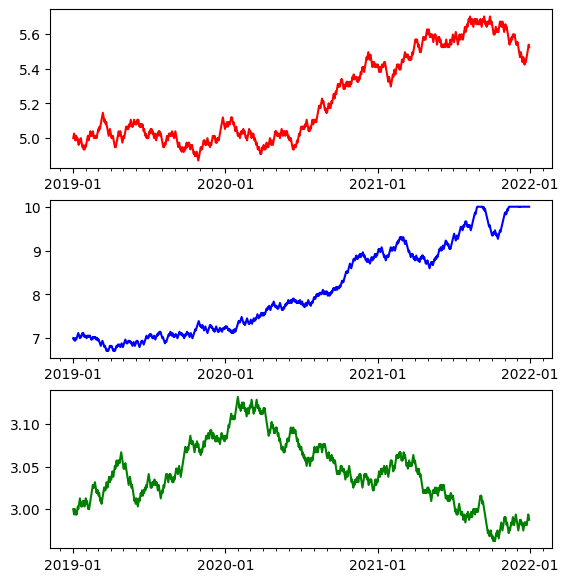

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 7))
gs = GridSpec(ncols=3, nrows=3, figure=fig)

ax = plt.subplot(gs[0, 0:2])
ax.plot(data,r,'r',label = 'waffle iron french toast')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax1 = fig.add_subplot(gs[1, 0:2])
ax1.plot(data,r1,'b',label = 'zwetschgenkuchen bavarian plum cake')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())


ax2 = fig.add_subplot(gs[2,0:2])
ax2.plot(data,r2,'g',label = 'lime tea')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())



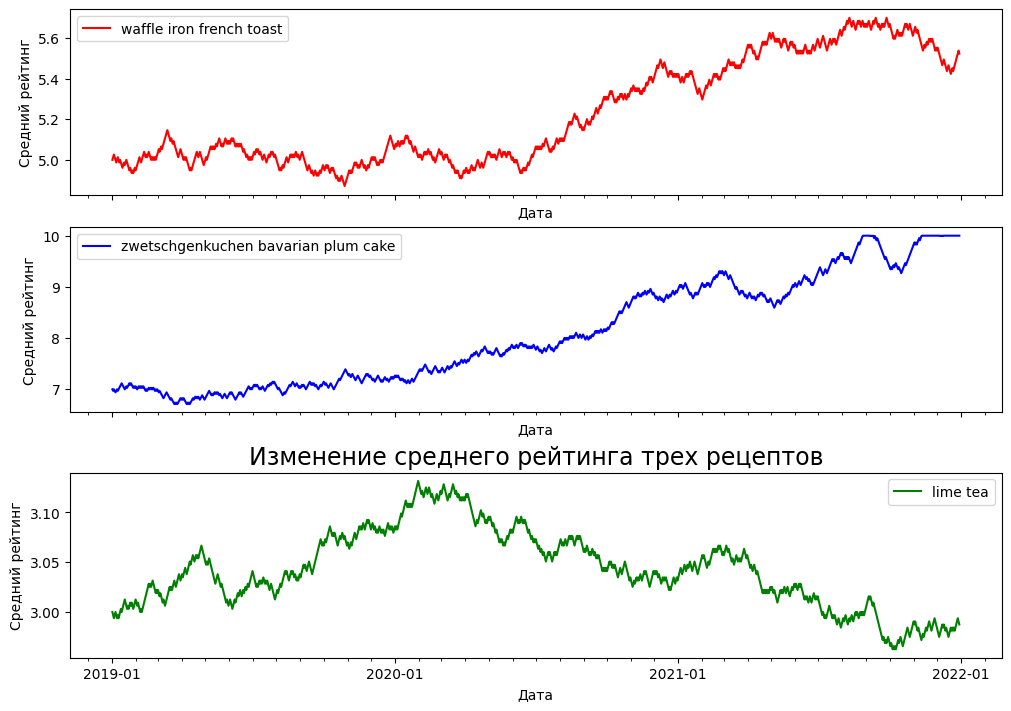

In [ ]:
fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 7),layout='constrained', sharex='col')


ax.plot(data,r,'r',label = 'waffle iron french toast')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.legend(loc = 'best')



ax2.plot(data,r2,'g',label = 'lime tea')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel('Дата')
ax2.set_ylabel('Средний рейтинг')
ax2.legend(loc = 'best')



ax1.plot(data,r1,'b',label = 'zwetschgenkuchen bavarian plum cake')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel('Дата')
ax1.set_ylabel('Средний рейтинг')
ax1.legend(loc = 'best')

plt.title('Изменение среднего рейтинга трех рецептов',fontsize = 17)
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


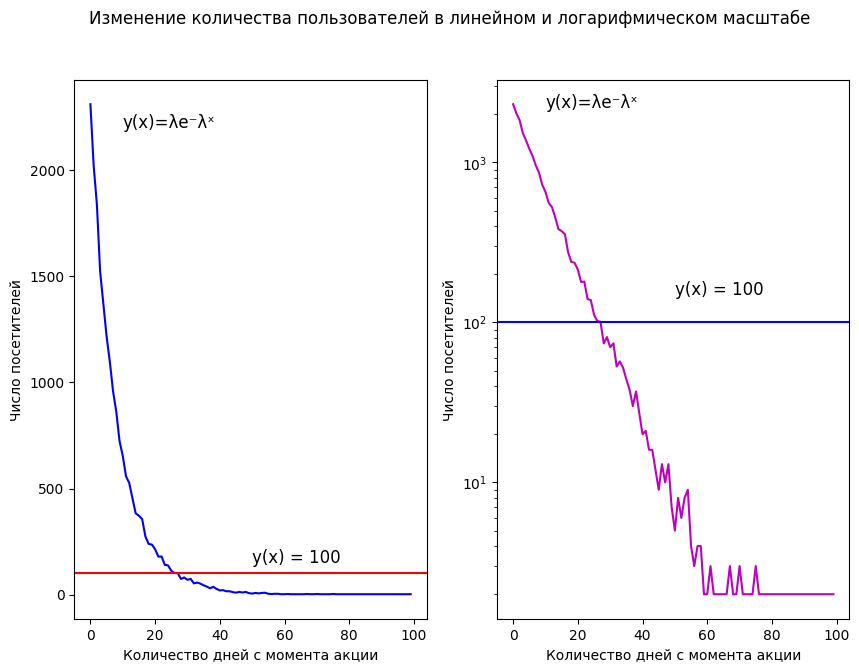

In [ ]:
from matplotlib.gridspec import GridSpec
visit = np.load('visitors.npy')
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(ncols=2, nrows=1, figure=fig)

visitors = [i for i in visit]
days = [ i for i in range(len(visit))]

ax = plt.subplot(gs[0,0])
ax.plot(days,visitors,'b')
plt.axhline (y=100, color='red', linestyle='solid')
ax.text(50,150,'y(x) = 100',color = 'black',fontsize=12)
ax.text(10,2200,'y(x)=λe⁻λˣ',
        color = 'black',    #  цвет шрифта
        fontsize = 12)

ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel('Число посетителей')

ax1 = plt.subplot(gs[0,1])
ax1.plot(days,visitors,'m')
plt.axhline (y=100, color='blue', linestyle='solid')
ax1.text(50,150,'y(x) = 100',color = 'black',fontsize=12)
ax1.text(10,2200,'y(x)=λe⁻λˣ',color = 'black', fontsize = 12)
ax1.set_yscale('log')

ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
import pandas as pd
recipes=pd.read_csv('recipes_sample.csv')
reviews=pd.read_csv('reviews_sample.csv')

In [ ]:
reviews 
reviews.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [ ]:
recipes 
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

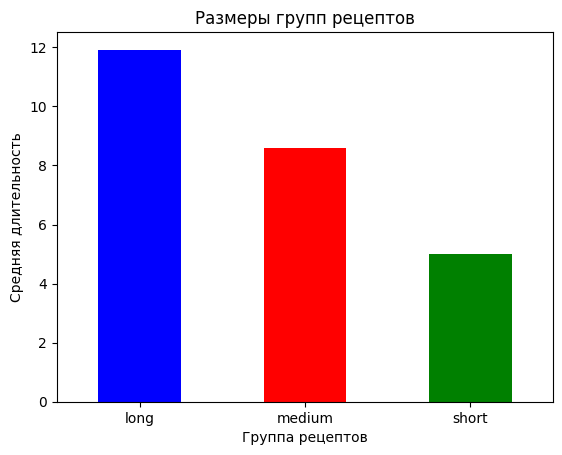

In [ ]:
recipes.loc[recipes['minutes']<5,'duration'] = 'short'
recipes.loc[(recipes['minutes']>=5) & (recipes['minutes']<50) ,'duration'] = 'medium'
recipes.loc[recipes['minutes']>=50,'duration'] = 'long'

gr_recipes = recipes.groupby('duration').agg({'n_steps':'mean','name':'size'}).rename(columns = {'name': 'size'})

fig,ax = plt.subplots()
gr_recipes['n_steps'].plot(kind='bar', rot=0,color=['blue','red','green'],ax=ax)
ax.set_xlabel('Группа рецептов')
ax.set_ylabel('Средняя длительность')
ax.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0, 'Рейтинг')

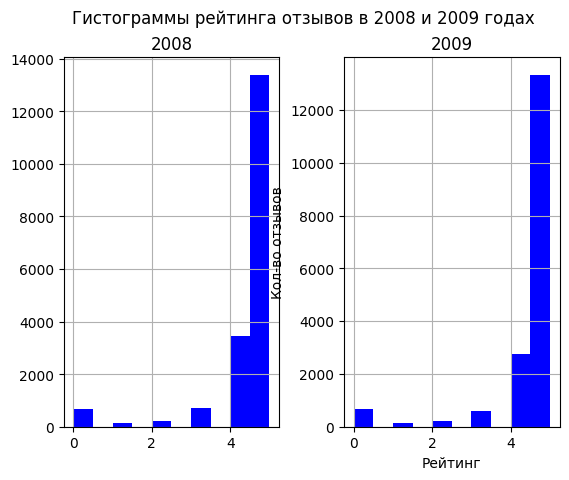

In [ ]:
df = pd.DataFrame({'2008': rev_2008['rating'],'2009':rev_2009['rating']})
hist = df.hist(color='b')
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.ylabel('Кол-во отзывов')
plt.xlabel('Рейтинг')


Text(0.5, 0, 'Рейтинг')

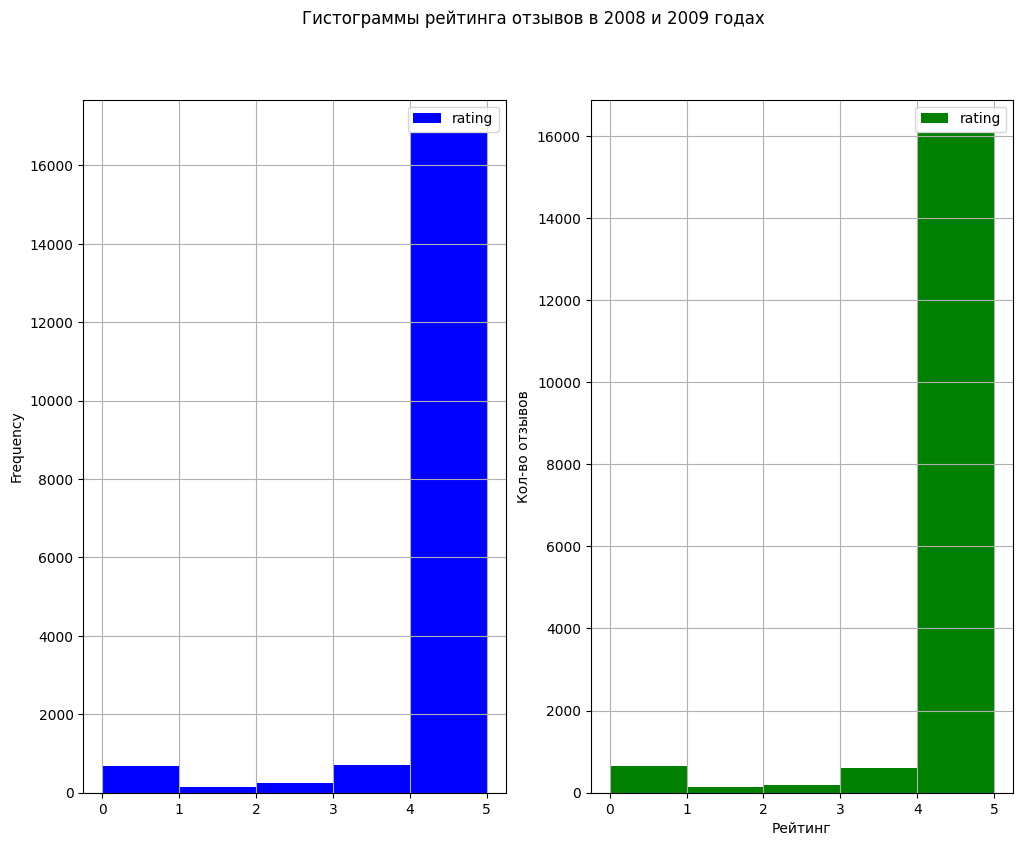

In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'])
rev_2008 = reviews[reviews['date'].dt.year == 2008]
rev_2009 = reviews[reviews['date'].dt.year == 2009]
fig,axs = plt.subplots(1,2,figsize=(12,9))
rev_2008["rating"].plot(kind = 'hist',ax=axs[0],legend= True,grid = True,bins=[0,1,2,3,4,5],color = 'b');
rev_2009["rating"].plot(kind = 'hist',ax=axs[1],legend= True,grid = True,bins=[0,1,2,3,4,5],color = 'g')
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.ylabel('Кол-во отзывов')
plt.xlabel('Рейтинг')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [ ]:
import seaborn as sns

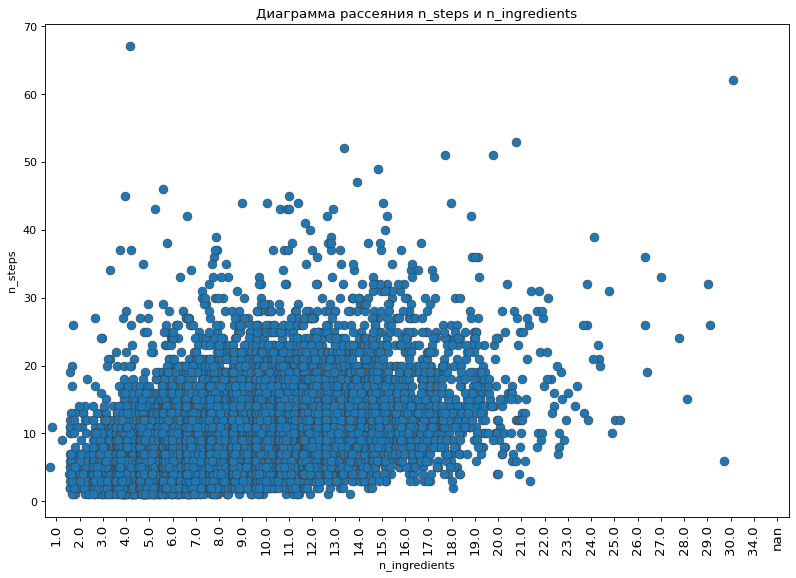

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
sns.stripplot(x='n_ingredients',y='n_steps', jitter=0.45, size=8, ax=ax, linewidth=0.5,data=recipes)
plt.title("Диаграмма рассеяния n_steps и n_ingredients")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.show()

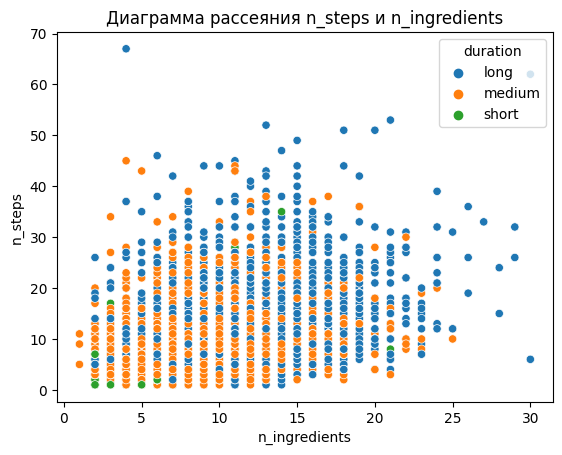

In [ ]:
diagr = sns.scatterplot(x='n_ingredients',y='n_steps',data=recipes,hue='duration')
diagr.axes.set_title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

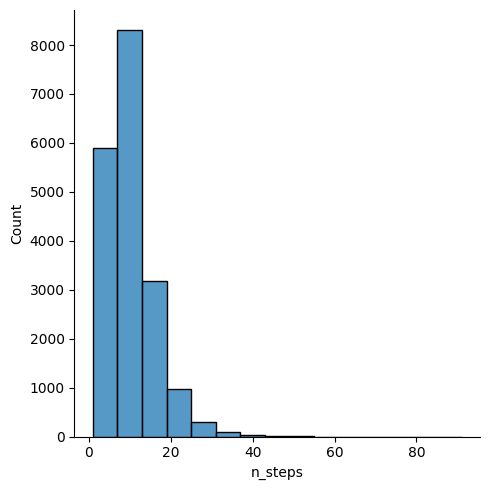

In [ ]:
sns.displot(recipes, x="n_steps",binwidth=6);